In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 14.2 MB/s eta 0:00:00


## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/01_PGES_bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,intermediate,3900.0
1,CHEMBL455936,Cc1cccc(Nc2cc(Cl)nc(SC(C(=O)O)c3cccc4ccccc34)n...,intermediate,5100.0
2,CHEMBL459722,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc3ncccc3c2)n1)C(=O)OCC,intermediate,5600.0
3,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,intermediate,2600.0
4,CHEMBL460616,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc(-c3ccccc3)cc2)n1)C(...,intermediate,1600.0
...,...,...,...,...
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,200.0
2130,CHEMBL5274544,Cc1cc(C(=O)Nc2nnc(-c3ccc(-c4ccccc4N)cc3)s2)cc(...,intermediate,3100.0
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,150.0
2132,CHEMBL5285589,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3c(Cl)ccnc3Cl)s2...,intermediate,1700.0


### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:


def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,407.967,6.00614,2.0,5.0
1,449.963,6.56164,2.0,5.0
2,459.015,6.41600,1.0,7.0
3,575.959,7.27150,2.0,7.0
4,456.011,7.05630,2.0,5.0
...,...,...,...,...
2129,452.333,5.59250,2.0,5.0
2130,421.913,5.06342,2.0,6.0
2131,451.349,5.46910,2.0,5.0
2132,442.331,5.40840,2.0,6.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,intermediate,3900.0
1,CHEMBL455936,Cc1cccc(Nc2cc(Cl)nc(SC(C(=O)O)c3cccc4ccccc34)n...,intermediate,5100.0
2,CHEMBL459722,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc3ncccc3c2)n1)C(=O)OCC,intermediate,5600.0
3,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,intermediate,2600.0
4,CHEMBL460616,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc(-c3ccccc3)cc2)n1)C(...,intermediate,1600.0
...,...,...,...,...
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,200.0
2130,CHEMBL5274544,Cc1cc(C(=O)Nc2nnc(-c3ccc(-c4ccccc4N)cc3)s2)cc(...,intermediate,3100.0
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,150.0
2132,CHEMBL5285589,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3c(Cl)ccnc3Cl)s2...,intermediate,1700.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,intermediate,3900.0,407.967,6.00614,2.0,5.0
1,CHEMBL455936,Cc1cccc(Nc2cc(Cl)nc(SC(C(=O)O)c3cccc4ccccc34)n...,intermediate,5100.0,449.963,6.56164,2.0,5.0
2,CHEMBL459722,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc3ncccc3c2)n1)C(=O)OCC,intermediate,5600.0,459.015,6.41600,1.0,7.0
3,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,intermediate,2600.0,575.959,7.27150,2.0,7.0
4,CHEMBL460616,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc(-c3ccccc3)cc2)n1)C(...,intermediate,1600.0,456.011,7.05630,2.0,5.0
...,...,...,...,...,...,...,...,...
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,200.0,452.333,5.59250,2.0,5.0
2130,CHEMBL5274544,Cc1cc(C(=O)Nc2nnc(-c3ccc(-c4ccccc4N)cc3)s2)cc(...,intermediate,3100.0,421.913,5.06342,2.0,6.0
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,150.0,451.349,5.46910,2.0,5.0
2132,CHEMBL5285589,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3c(Cl)ccnc3Cl)s2...,intermediate,1700.0,442.331,5.40840,2.0,6.0


In [ ]:

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [ ]:
df_combined.standard_value.describe()

count      2134.000000
mean       3479.893332
std       13934.802092
min           0.100000
25%           5.600000
50%         180.000000
75%        2000.000000
max      200000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,intermediate,407.967,6.00614,2.0,5.0,3900.0
1,CHEMBL455936,Cc1cccc(Nc2cc(Cl)nc(SC(C(=O)O)c3cccc4ccccc34)n...,intermediate,449.963,6.56164,2.0,5.0,5100.0
2,CHEMBL459722,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc3ncccc3c2)n1)C(=O)OCC,intermediate,459.015,6.41600,1.0,7.0,5600.0
3,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,intermediate,575.959,7.27150,2.0,7.0,2600.0
4,CHEMBL460616,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc(-c3ccccc3)cc2)n1)C(...,intermediate,456.011,7.05630,2.0,5.0,1600.0
...,...,...,...,...,...,...,...,...
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,452.333,5.59250,2.0,5.0,200.0
2130,CHEMBL5274544,Cc1cc(C(=O)Nc2nnc(-c3ccc(-c4ccccc4N)cc3)s2)cc(...,intermediate,421.913,5.06342,2.0,6.0,3100.0
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,451.349,5.46910,2.0,5.0,150.0
2132,CHEMBL5285589,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3c(Cl)ccnc3Cl)s2...,intermediate,442.331,5.40840,2.0,6.0,1700.0


In [ ]:
df_norm.standard_value_norm.describe()

count      2134.000000
mean       3479.893332
std       13934.802092
min           0.100000
25%           5.600000
50%         180.000000
75%        2000.000000
max      200000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,intermediate,407.967,6.00614,2.0,5.0,5.408935
1,CHEMBL455936,Cc1cccc(Nc2cc(Cl)nc(SC(C(=O)O)c3cccc4ccccc34)n...,intermediate,449.963,6.56164,2.0,5.0,5.292430
2,CHEMBL459722,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc3ncccc3c2)n1)C(=O)OCC,intermediate,459.015,6.41600,1.0,7.0,5.251812
3,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,intermediate,575.959,7.27150,2.0,7.0,5.585027
4,CHEMBL460616,CCCCCCC(Sc1nc(Cl)cc(Nc2ccc(-c3ccccc3)cc2)n1)C(...,intermediate,456.011,7.05630,2.0,5.0,5.795880
...,...,...,...,...,...,...,...,...
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,452.333,5.59250,2.0,5.0,6.698970
2130,CHEMBL5274544,Cc1cc(C(=O)Nc2nnc(-c3ccc(-c4ccccc4N)cc3)s2)cc(...,intermediate,421.913,5.06342,2.0,6.0,5.508638
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,451.349,5.46910,2.0,5.0,6.823909
2132,CHEMBL5285589,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3c(Cl)ccnc3Cl)s2...,intermediate,442.331,5.40840,2.0,6.0,5.769551


In [ ]:
df_final.pIC50.describe()

count    2134.000000
mean        6.889159
std         1.371797
min         3.698970
25%         5.698970
50%         6.744727
75%         8.251812
max        10.000000
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('02_PGES_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
11,CHEMBL518038,CCCCCCC(Sc1nc(Cl)cc(Nc2cccc(C)c2C)n1)C(=O)O,inactive,407.967,6.00614,2.0,5.0,4.920819
13,CHEMBL457000,CCCCCCC(Sc1nc(Cl)cc(Nc2cc(OCC(F)(F)F)cc(OCC(F)...,inactive,575.959,7.27150,2.0,7.0,4.522879
15,CHEMBL182032,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(-c3c...,active,526.051,8.77782,1.0,2.0,7.920819
27,CHEMBL270347,Fc1cccc(Cl)c1-c1nc2c3ccccc3c3ccccc3c2[nH]1,active,346.792,6.32880,1.0,1.0,7.443697
28,CHEMBL568545,Fc1cccc(Cl)c1-c1nc2c3ccc(Cl)cc3c3ccccc3c2[nH]1,active,381.237,6.98220,1.0,1.0,8.301030
...,...,...,...,...,...,...,...,...
2123,CHEMBL5197602,S=c1[nH]nc(-c2ccc3[nH]c(-c4ccc(Oc5ccccc5)cc4)n...,active,386.436,5.73479,2.0,5.0,7.522879
2126,CHEMBL5190547,CC(c1ccc(Oc2ccccc2)cc1)c1nc2cc(-c3n[nH]c(=S)o3...,active,414.490,6.21959,2.0,5.0,7.045757
2129,CHEMBL5284133,O=C(Nc1nnc(-c2ccc(-c3cccc(O)c3)cc2)s1)c1ccccc1Br,active,452.333,5.59250,2.0,5.0,6.698970
2131,CHEMBL5284121,Nc1ccccc1-c1ccc(-c2nnc(NC(=O)c3ccccc3Br)s2)cc1,active,451.349,5.46910,2.0,5.0,6.823909


---

In [ ]:
df_2class.to_csv('04_PGES_bioactivity_data_2class_pIC50.csv')

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

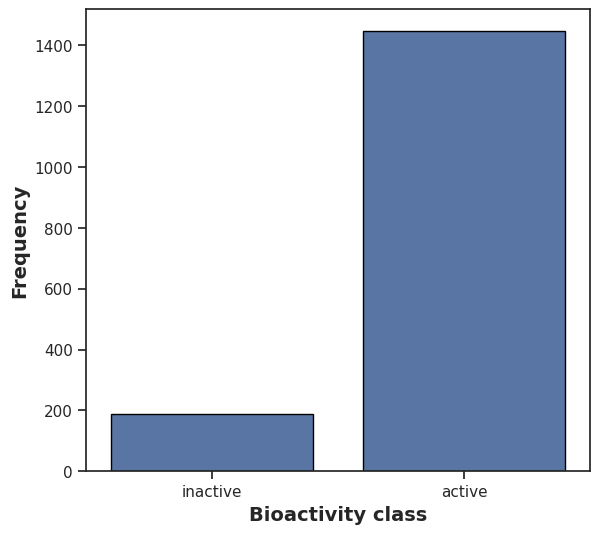

In [ ]:
plt.figure(figsize=(6.5, 6))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class_active_inactive.png')

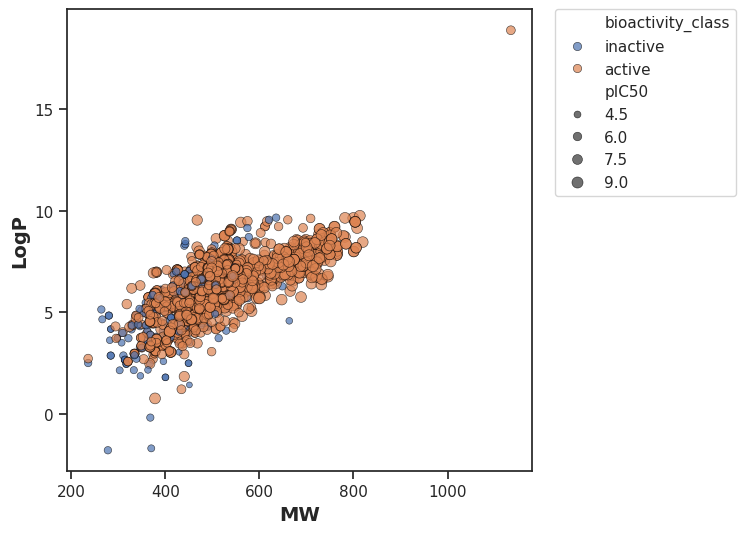

In [ ]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

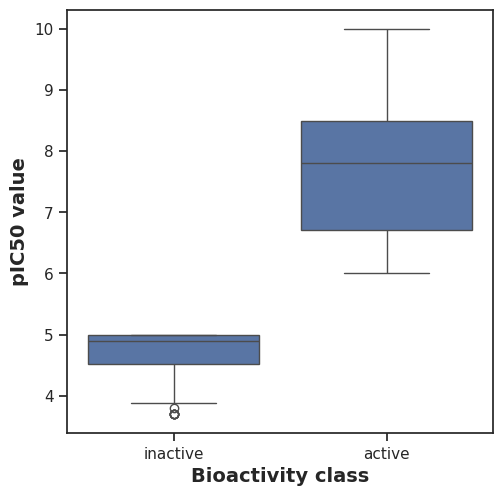

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.png')

#### **MW**

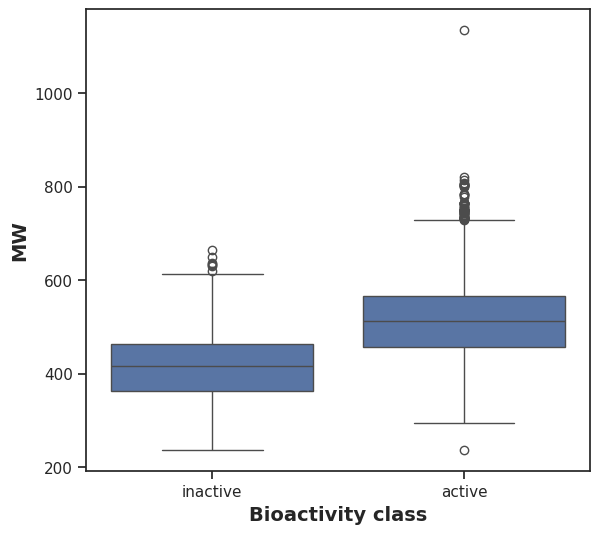

In [ ]:
plt.figure(figsize=(6.5, 6))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW_bioactivity_class.png')

#### **LogP**

Text(0, 0.5, 'LogP')

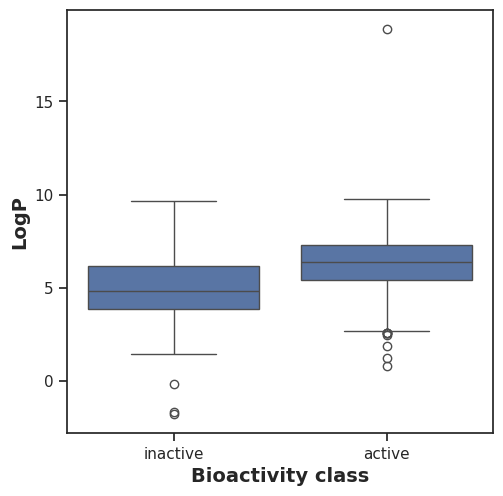

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# plt.savefig('plot_LogP.pdf')

#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

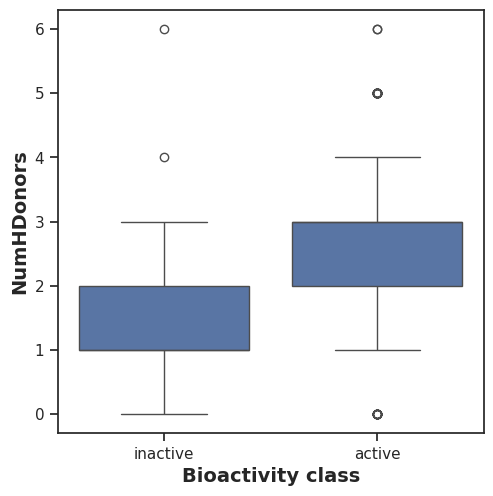

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHDonors.pdf')

#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

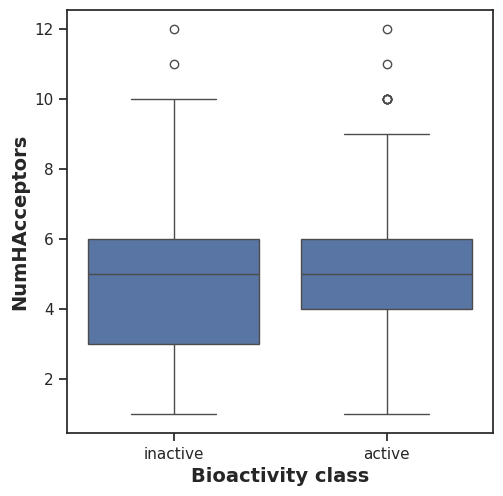

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHAcceptors.pdf')